In [ ]:
import os
import glob
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
try:
  from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
except:
  !pip install torchmetrics
  from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
SSIM = StructuralSimilarityIndexMeasure()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
os.listdir(os.getcwd())

['.config', 'drive', 'sample_data']

In [ ]:
source_path = os.getcwd() + '/drive/MyDrive/DARES/DARES_imgs/scared*'
target_path = os.getcwd() + '/drive/MyDrive/DARES/SCARED_Images_Resized/*/*/*/*/*png'
print(len(glob.glob(source_path)), len(glob.glob(target_path)))

2 28857


In [ ]:
source_files = glob.glob(source_path)
target_files = glob.glob(target_path)

In [ ]:
x = np.random.randn(256,256)
y = np.random.randn(256,256)
x, y = torch.tensor(x), torch.tensor(y)
x, y = x.unsqueeze(0).unsqueeze(0), y.unsqueeze(0).unsqueeze(0)

In [ ]:
SSIM(x,y)

tensor(0.0144)

In [ ]:
x = Image.open(source_files[0])
x = np.array(x)
x.shape

(296, 373, 4)

In [ ]:
y = Image.open(target_files[0])
y = np.array(y)
y = torch.tensor(y)
y.permute(2, 0, 1).shape

torch.Size([3, 256, 320])

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def check_imgs(target, source, img_size=(256, 320)):
    source = np.array(source)
    if source.shape[-1] == 4:
        source = source[:,:,:3]

    source = cv2.resize(source, dsize=img_size)
    target = cv2.resize(target, dsize=img_size)

    source = rgb2gray(source)
    target = rgb2gray(target)

    assert (source.shape == target.shape), f"shape between target and source is not same {source.shape}, {target.shape}"

    source = (source - source.min())/(source.max() - source.min())
    target = (target - target.min())/(target.max() - target.min())

    return ssim(target, source, data_range=target.max()-target.min())

for i, source_img in enumerate(source_files):
    source_img = cv2.imread(source_img)
    ssim_lst = []
    for j, target_img in enumerate(target_files):
        # if 'dataset2' not in target_img:
        #     continue
        target_img = cv2.imread(target_img)
        ssim_lst.append(check_imgs(target_img, source_img))
        if ssim_lst[-1] >= 0.999:
            break
        if j%1000 == 0:
            print(j)
    ssim_max = np.argmax(np.array(ssim_lst))
    print(f"Source: {source_files[i]} Target: {target_files[ssim_max]} SSIM: {ssim_lst[ssim_max]}")


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
Source: /content/drive/MyDrive/DARES/DARES_imgs/scared1.PNG Target: /content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001352.png SSIM: 0.8143861131214455
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
Source: /content/drive/MyDrive/DARES/DARES_imgs/scared2.PNG Target: /content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001253.png SSIM: 0.7030686575966166


In [ ]:
 # Source: /content/drive/MyDrive/DARES/DARES_imgs/scared1.PNG Target: /content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001352.png
 img_size = (256,320)
source_img = '/content/drive/MyDrive/DARES/DARES_imgs/scared1.PNG'
target_img = '/content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001352.png'

source_img = cv2.imread(source_img)
target_img = cv2.imread(target_img)

source_img = source_img[:,:,:3]

source_img = cv2.resize(source_img, dsize=img_size)
target_img = cv2.resize(target_img, dsize=img_size)

array([[[34, 23, 49],
        [36, 25, 51],
        [36, 25, 51],
        ...,
        [83, 40, 85],
        [83, 40, 85],
        [80, 37, 82]],

       [[35, 24, 50],
        [36, 25, 51],
        [37, 26, 52],
        ...,
        [75, 32, 77],
        [80, 36, 82],
        [81, 38, 83]],

       [[37, 26, 52],
        [37, 26, 52],
        [37, 26, 52],
        ...,
        [73, 30, 75],
        [81, 38, 83],
        [87, 44, 89]],

       ...,

       [[73, 40, 80],
        [78, 40, 83],
        [87, 42, 87],
        ...,
        [42, 26, 76],
        [38, 25, 74],
        [35, 23, 71]],

       [[70, 38, 77],
        [79, 40, 82],
        [87, 42, 86],
        ...,
        [42, 26, 74],
        [39, 24, 72],
        [35, 22, 70]],

       [[71, 41, 78],
        [80, 42, 82],
        [90, 44, 87],
        ...,
        [42, 26, 73],
        [39, 24, 71],
        [35, 22, 68]]], dtype=uint8)
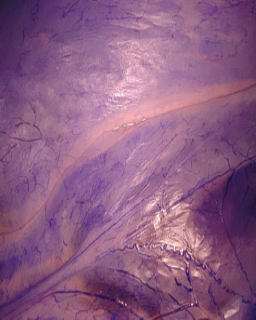

In [ ]:
source_img

array([[[35, 23, 50],
        [36, 24, 51],
        [36, 25, 51],
        ...,
        [83, 40, 84],
        [85, 43, 86],
        [81, 38, 84]],

       [[35, 23, 50],
        [36, 24, 51],
        [36, 25, 51],
        ...,
        [84, 42, 85],
        [85, 43, 86],
        [82, 40, 85]],

       [[36, 24, 51],
        [37, 25, 52],
        [37, 26, 52],
        ...,
        [83, 40, 85],
        [83, 41, 85],
        [81, 39, 84]],

       ...,

       [[73, 37, 80],
        [81, 40, 84],
        [90, 41, 88],
        ...,
        [41, 27, 78],
        [39, 25, 75],
        [33, 23, 72]],

       [[74, 39, 81],
        [83, 42, 86],
        [91, 44, 90],
        ...,
        [41, 28, 77],
        [39, 24, 74],
        [35, 22, 72]],

       [[70, 41, 82],
        [83, 44, 87],
        [89, 44, 89],
        ...,
        [42, 29, 76],
        [40, 26, 73],
        [38, 24, 71]]], dtype=uint8)
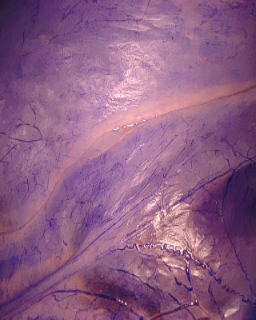

In [ ]:
target_img

In [ ]:
# Source: /content/drive/MyDrive/DARES/DARES_imgs/scared2.PNG Target: /content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001352.png
source_img = '/content/drive/MyDrive/DARES/DARES_imgs/scared2.PNG'
target_img = '/content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000001253.png'

source_img = cv2.imread(source_img)
target_img = cv2.imread(target_img)

source_img = source_img[:,:,:3]

source_img = cv2.resize(source_img, dsize=img_size)
target_img = cv2.resize(target_img, dsize=img_size)

array([[[75, 39, 81],
        [77, 41, 83],
        [83, 47, 89],
        ...,
        [90, 45, 87],
        [82, 44, 84],
        [76, 42, 81]],

       [[81, 45, 87],
        [83, 47, 89],
        [83, 47, 89],
        ...,
        [87, 47, 88],
        [78, 43, 83],
        [70, 40, 79]],

       [[82, 46, 88],
        [81, 45, 88],
        [82, 46, 88],
        ...,
        [84, 45, 86],
        [76, 42, 82],
        [70, 40, 79]],

       ...,

       [[79, 42, 72],
        [80, 39, 70],
        [83, 43, 74],
        ...,
        [60, 31, 45],
        [61, 32, 45],
        [65, 33, 47]],

       [[74, 39, 69],
        [81, 42, 72],
        [81, 44, 74],
        ...,
        [60, 30, 46],
        [63, 32, 47],
        [66, 33, 48]],

       [[70, 36, 66],
        [78, 40, 70],
        [79, 43, 73],
        ...,
        [60, 28, 45],
        [62, 29, 46],
        [65, 30, 47]]], dtype=uint8)
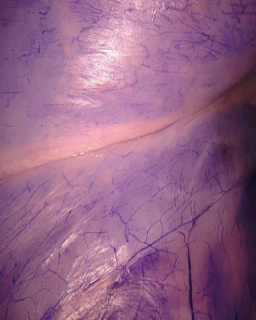

In [ ]:
source_img

array([[[83, 46, 89],
        [71, 33, 75],
        [76, 37, 80],
        ...,
        [96, 39, 83],
        [93, 41, 83],
        [88, 44, 86]],

       [[85, 48, 90],
        [71, 33, 76],
        [74, 36, 79],
        ...,
        [96, 42, 85],
        [91, 40, 83],
        [86, 42, 83]],

       [[84, 47, 89],
        [72, 34, 77],
        [76, 38, 81],
        ...,
        [96, 45, 87],
        [88, 41, 83],
        [82, 41, 82]],

       ...,

       [[76, 40, 71],
        [77, 39, 70],
        [82, 43, 74],
        ...,
        [63, 31, 45],
        [64, 32, 46],
        [67, 34, 48]],

       [[74, 38, 70],
        [75, 39, 70],
        [80, 42, 73],
        ...,
        [62, 30, 46],
        [64, 31, 47],
        [67, 33, 49]],

       [[76, 40, 72],
        [76, 39, 72],
        [79, 40, 74],
        ...,
        [64, 29, 50],
        [66, 31, 51],
        [69, 34, 54]]], dtype=uint8)
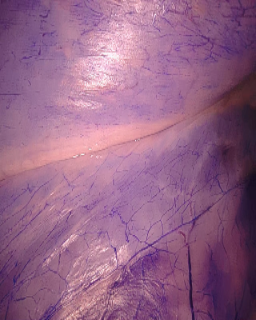

In [ ]:
target_img